# 기계학습및실습 2024년 2학기 중간과제
*2021100936 인공지능융합학부 차상호*
* 가족과 함께 탐승하는 경우 혼자 탑승했을 경우보다 더 높은 등급에 탑승할 확률이 높을 것이라는 가설을 세우고 예측하는 분류 모델을 만들고자 한다.

### 목차

* 1. 데이터 불러오기
    * 1.1 데이터 확인기기

* 2. 데이터 셋에 대한 궁금증
    * 2.1 등급별 평균 요금 구하기
    * 2.3 등급별 생존자 수 구하기

* 3. 같이 탑승했을 경우에 대한 궁금증
    * 3.1 가족 크기 비교하기
    * 3.2 동반자 수에 따른 생존 확률
- -가설 세우기
    - -각 클래스 별 가족과 함께 탑승한 사람과 혼자 탑승한 사람 비교하기
    - -그렇다면 가족과 함께 탑승할때 더 비싸고 좋은 좌석을 선택했을 것이라고 가설을 세움

### 1. 데이터 불러오기 <a class="anchor" id="1"></a>

#### 1.1 데이터 확인기기<a class="anchor" id="1.1"></a>

### 2. 데이터 셋에 대한 궁금증 <a class="anchor" id="section_1_2"></a>

#### 2.1 등급별 평균 요금 구하기 <a class="anchor" id="section_1_2_1"></a>

#### 2.2 등급별 평균 요금 시각화하기<a class="anchor" id="section_1_2_2"></a>

#### 2.3 등급별 생존자 수 구하기 <a class="anchor" id="section_1_2_3"></a>

### 3. 같이 탑승했을 경우에 대한 궁금증 <a class="anchor" id="chapter2"></a>

#### 3.1 가족 크기 비교하기 <a class="anchor" id="section_2_1"></a>

#### 3.2 동반자 수에 따른 생존 확률 <a class="anchor" id="section_2_1"></a>

## 가족의 수가 많을 경우 혼자 탑승했을 경우보다 생존률이 높을 것을 확인 <a class="anchor" id="section_2_1"></a>

### 그렇다면 가족과 함께 탑승할때 더 비싸고 좋은 좌석을 선택했을 것이라고 가설 <a class="anchor" id="section_2_1"></a>



#### Section 2.2 <a class="anchor" id="section_2_2"></a>
출처: https://gmnam.tistory.com/246 [Voyager:티스토리]

## 1. 데이터 불러오기

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/train.csv", index_col="PassengerId")
df_test = pd.read_csv("./data/test.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1.1 데이터 확인하기

클래스 별 탑승자 수

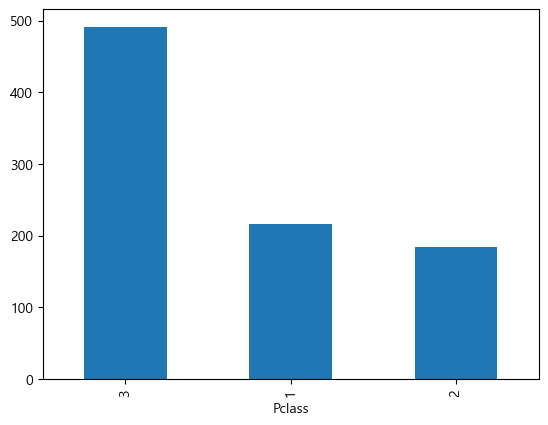

In [132]:
df["Pclass"].value_counts().plot(kind="bar", x="Pclass")
plt.show()

클래스 별로 몇명이 있는지 확인하기

In [134]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

## 2. 데이터 셋에 대한 궁금증

### 2.1 등급별 평균 요금이 궁금했음.

In [135]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [136]:
sorted_pclass_3 = df[(df['Pclass'] == 3) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_3.to_string(max_rows=10))
average_fare_pclass_3 = sorted_pclass_3['Fare'].mean()
print(f"3등급 승객들의 평균 요금 = {average_fare_pclass_3}")

             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                                
379                 0       3    male  20.0      0      0   4.0125        C
327                 0       3    male  61.0      0      0   6.2375        S
844                 0       3    male  34.5      0      0   6.4375        C
819                 0       3    male  43.0      0      0   6.4500        S
372                 0       3    male  18.0      1      0   6.4958        S
...               ...     ...     ...   ...    ...    ...      ...      ...
864                 0       3  female   NaN      8      2  69.5500        S
793                 0       3  female   NaN      8      2  69.5500        S
181                 0       3  female   NaN      8      2  69.5500        S
325                 0       3    male   NaN      8      2  69.5500        S
160                 0       3    male   NaN      8      2  69.5500        S
3등급 승객들의 평균 

In [137]:
sorted_pclass_2 = df[(df['Pclass'] == 2) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_2.to_string(max_rows=10))
average_fare_pclass_2 = sorted_pclass_2['Fare'].mean()
print(f"2등급 승객들의 평균 요금 = {average_fare_pclass_2}")

             Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
PassengerId                                                             
34                  0       2    male  66.0      0      0  10.5        S
85                  1       2  female  17.0      0      0  10.5        S
67                  1       2  female  29.0      0      0  10.5        S
57                  1       2  female  21.0      0      0  10.5        S
71                  0       2    male  32.0      0      0  10.5        S
...               ...     ...     ...   ...    ...    ...   ...      ...
386                 0       2    male  18.0      0      0  73.5        S
121                 0       2    male  21.0      2      0  73.5        S
73                  0       2    male  21.0      0      0  73.5        S
666                 0       2    male  32.0      2      0  73.5        S
656                 0       2    male  24.0      2      0  73.5        S
2등급 승객들의 평균 요금 = 21.358661235955054


In [138]:
sorted_pclass_1 = df[(df['Pclass'] == 1) & (df['Fare'] > 0)].sort_values(by='Fare', ascending=True)
print(sorted_pclass_1.to_string(max_rows=10))
average_fare_pclass_1 = sorted_pclass_1['Fare'].mean()
print(f"1등급 승객들의 평균 요금 = {average_fare_pclass_1}")

             Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
PassengerId                                                                 
873                 0       1    male  33.0      0      0    5.0000        S
663                 0       1    male  47.0      0      0   25.5875        S
169                 0       1    male   NaN      0      0   25.9250        S
797                 1       1  female  49.0      0      0   25.9292        S
863                 1       1  female  48.0      0      0   25.9292        S
...               ...     ...     ...   ...    ...    ...       ...      ...
89                  1       1  female  23.0      3      2  263.0000        S
342                 1       1  female  24.0      3      2  263.0000        S
259                 1       1  female  35.0      0      0  512.3292        C
680                 1       1    male  36.0      0      1  512.3292        C
738                 1       1    male  35.0      0      0  512.3292        C

### 2.2 등급별 평균 요금 시각화하기

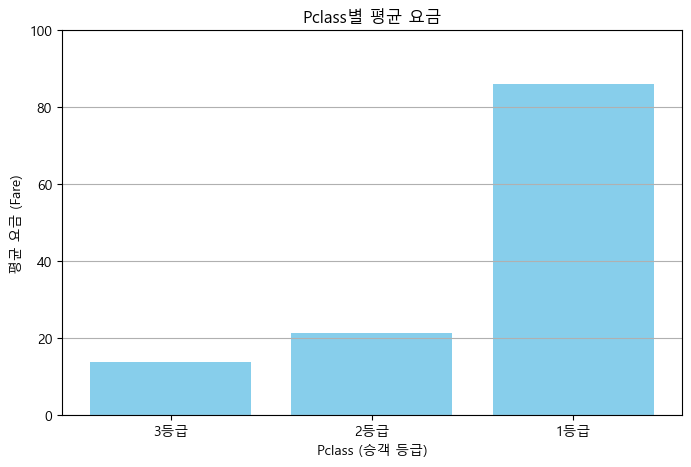

In [139]:
plt.rcParams['font.family'] = 'Malgun Gothic'

sorted_fares = [average_fare_pclass_3, average_fare_pclass_2, average_fare_pclass_1]
pclass_labels = ['3등급', '2등급', '1등급']

plt.figure(figsize=(8, 5))
plt.bar(pclass_labels, sorted_fares, color='skyblue')
plt.xlabel('Pclass (승객 등급)')
plt.ylabel('평균 요금 (Fare)')
plt.title('Pclass별 평균 요금')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

### 2.3 등급별 생존자 수 구하기

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


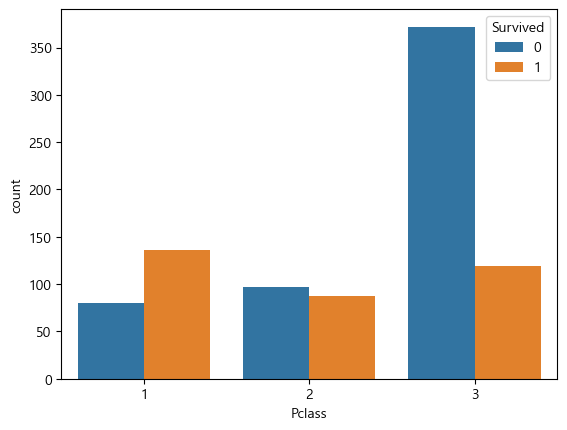

In [140]:
print(df['Pclass'].value_counts())
ax = sns.countplot(x = 'Pclass', hue = 'Survived',  data = df)

### 3. 같이 탑승했을 경우에 대한 궁금증

### 3.1 가족 크기 비교하기

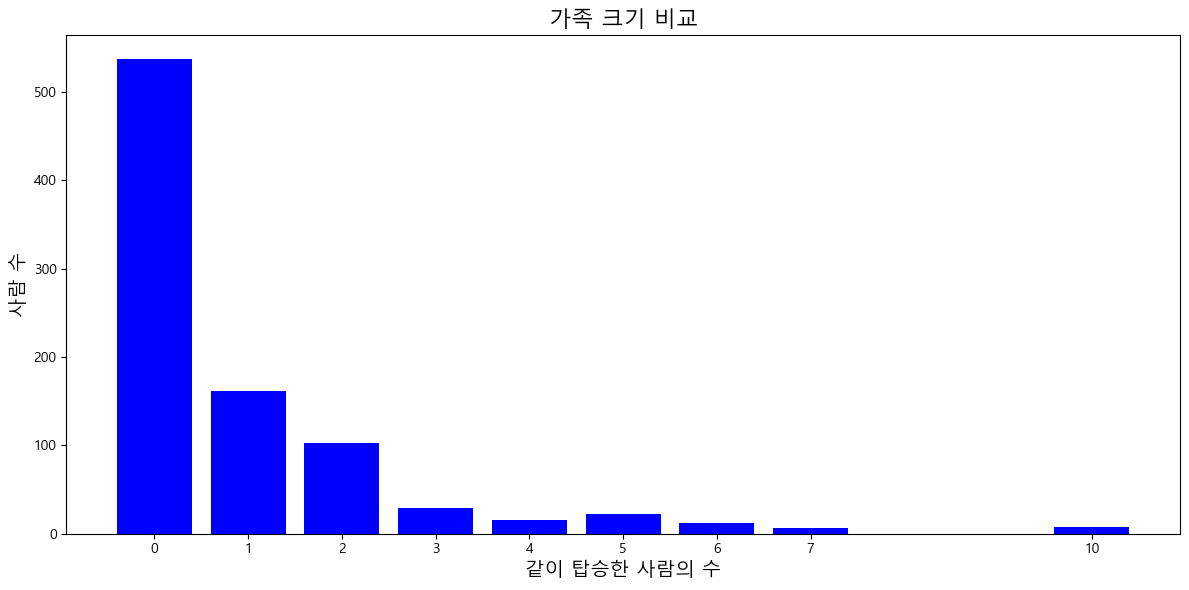

In [141]:
df['family_size'] = df['SibSp'] + df['Parch']

# 가족 크기 분포 시각화 (seaborn 없이)
plt.figure(figsize=(12, 6))
family_size_count = df['family_size'].value_counts().sort_index()

plt.bar(family_size_count.index, family_size_count.values, color='blue')
plt.title('가족 크기 비교', fontsize=16)
plt.xlabel('같이 탑승한 사람의 수', fontsize=14)
plt.ylabel('사람 수', fontsize=14)
plt.xticks(family_size_count.index)
plt.tight_layout()
plt.show()

### 3.2 동반자 수에 따른 생존 확률

In [142]:
survival_prob = df.groupby('family_size')['Survived'].mean().reset_index()
print(survival_prob)

   family_size  Survived
0            0  0.303538
1            1  0.552795
2            2  0.578431
3            3  0.724138
4            4  0.200000
5            5  0.136364
6            6  0.333333
7            7  0.000000
8           10  0.000000


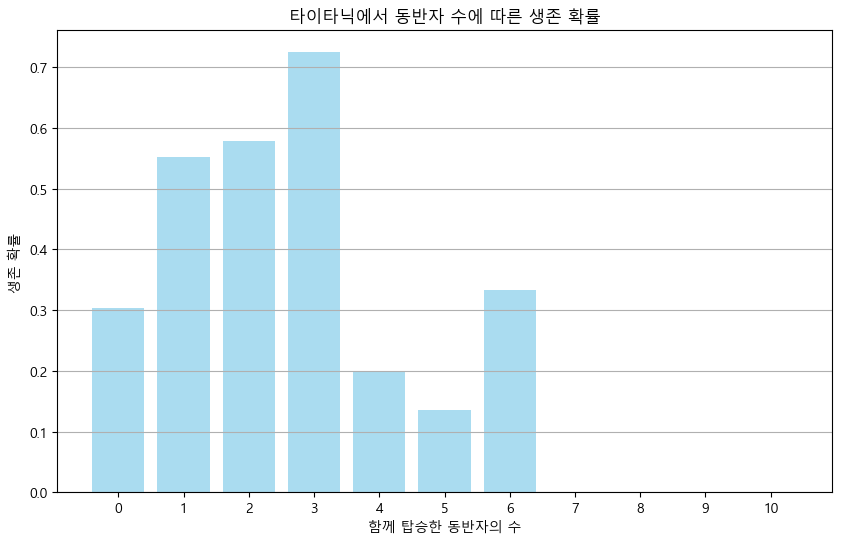

In [143]:
plt.figure(figsize=(10, 6))
plt.bar(survival_prob['family_size'], survival_prob['Survived'], color='skyblue', alpha=0.7)
plt.title('타이타닉에서 동반자 수에 따른 생존 확률')
plt.xlabel('함께 탑승한 동반자의 수')
plt.ylabel('생존 확률')
plt.xticks(range(int(survival_prob['family_size'].max()) + 1))
plt.grid(axis='y')
plt.show()

### -각 클래스 별 가족과 함께 탑승한 사람과 혼자 탑승한 사람 비교하기

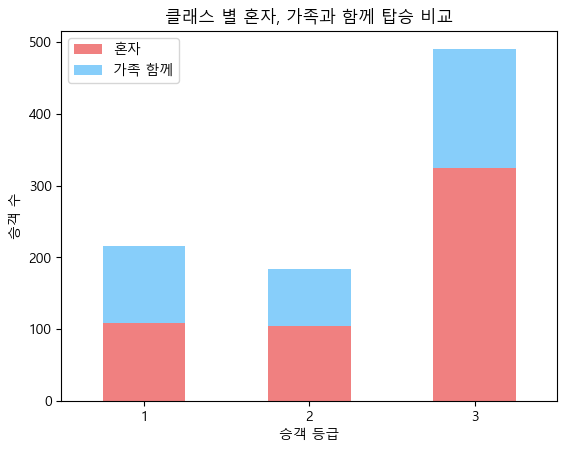

In [144]:
df['family_size'] = df['family_size'].apply(lambda x: 1 if x > 0 else 0)

# 클래스별 가족과 함께 또는 혼자 탑승한 사람의 수 계산
family_counts = df.groupby(['Pclass', 'family_size']).size().unstack()

# 그래프로 시각화
family_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightskyblue'])
plt.title('클래스 별 혼자, 가족과 함께 탑승 비교')
plt.xlabel('승객 등급')
plt.ylabel('승객 수')
plt.legend(['혼자', '가족 함께'])
plt.xticks(rotation=0)
plt.show()

# 모델 만들기

### -가족과 함께 탑승할때 더 비싸고 좋은 좌석을 선택했을 것이라고 가설을 세움

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df['with_family'] = (df['family_size'] > 0).astype(int)  # 1: 가족 동반, 0: 혼자

# 범주형 변수를 수치형으로 변환 (sex, embarked)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 목표 변수 생성 (좌석 등급과 운임 기준으로 좋은 좌석 정의)
# Pclass 값이 낮고 Fare 값이 높은 경우 더 좋은 좌석으로 정의
df['target'] = ((df['Pclass'] <= 2) & (df['Fare'] > df['Fare'].median())).astype(int)

# 불필요한 컬럼 제거
df = df.drop(columns=['SibSp', 'Parch', 'family_size'])


In [146]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=['target'])
y = df['target']

# 데이터 분할 (훈련 세트와 테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [147]:
# 랜덤 포레스트 분류 모델 생성
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)


In [148]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        61

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179


Confusion Matrix:
 [[118   0]
 [  0  61]]
